In [2]:
import rds_config
import pandas as pd
from sqlalchemy import create_engine

#rds settings
db_host  = rds_config.db_host
db_username = rds_config.db_username
db_password = rds_config.db_password
db_name = rds_config.db_name


SQLALCHEMY_DATABASE_URI = 'mysql+pymysql://' + db_username + ':' + db_password + '@' + db_host + '/' + db_name + '?charset=utf8'

engine = create_engine(SQLALCHEMY_DATABASE_URI)
connection = engine.connect()

In [3]:
sql = "SELECT oid, aid, substring(date, 6,2) as month, substring(date, 9,2) as date, media, title, org_url, org_count, naver_count, org_count+naver_count as total_count, section, ml_section FROM newscrawl WHERE org_count>0 or naver_count>0 "
df = pd.read_sql(sql, connection)
#pd.read_csv("dcdata10.csv")

In [4]:
df_section = df[['section', 'ml_section', 'media', 'total_count']].where(df['ml_section']>0)
df_section_sum = df_section[['ml_section','total_count']].groupby(['ml_section']).agg(['sum'])

## 섹션별 공유 현황
정치, 경제, 사회, 생활/문화, 국제, IT/과학

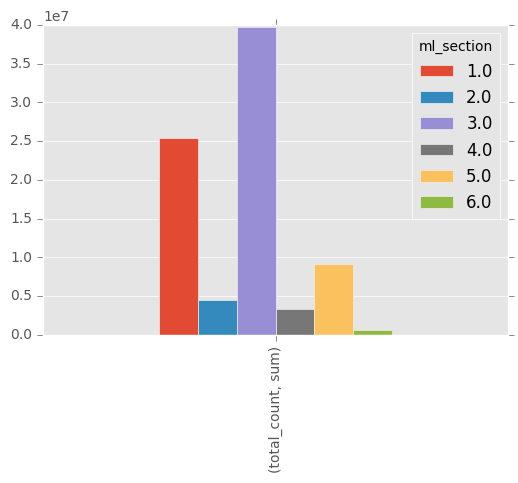

In [5]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(300, 300),dpi=200); 
matplotlib.style.use('ggplot')
df_section_sum.T.plot.bar();

## 공유건 수별 갯수

In [13]:
count_df=df[['total_count', 'aid']].groupby('total_count').agg(['count'])
count_df

,aid
,count
total_count,
1,85208
2,36020
3,23912
4,17997
5,14642
6,12345
7,10630
8,9398


## 언론사별 공유 갯수 합

In [33]:
df_total=df[['media', 'total_count']].where(df['section']!="스포츠ㆍ연예").groupby(['media']).agg(['count','sum'])
df_total

total_count            
               count         sum
media                           
chosun         42392   8438775.0
donga          21105   1015223.0
edaily         17025    644809.0
hani           28282  15347208.0
joins          36530  10529277.0
jtbc           13832   5819316.0
kbs            24809   1126743.0
kh             31559  11482597.0
mbc            12672    531932.0
mk             31630   1502824.0
nocut          17321   2115983.0
ohmynews       21231  14340226.0
sbs            42123   8339884.0
yonhap        100746   7488569.0
ytn            21148   7180749.0